<a href="https://colab.research.google.com/github/Sphumelel/Sphumelel/blob/main/Impact_of_COVID_19_on_SMEs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('/content/Washed Data.csv', encoding='latin-1')

In [ ]:
print(data.head())

   loyer  No of employee Annual turnover         TCTC Basic Salary  \
0      1              63      3098000000  13782989.04   9500520.21   
1      2              73        15000000    326574.61       992400   
2      3              18               0    543629.21    397789.63   
3      4              25        52000000    725607.67       496910   
4      5               1        765270.6    205385.34        31530   

   Cash Injection  Contrib Waiver  Affected Employee  
0               0               1                  0  
1               1               1                  1  
2               0               1                  1  
3               0               1                  1  
4               0               0                  0  


In [5]:
data = data.dropna()

In [6]:
# Features and target variable
features=['loyer','No of employee', 'Annual turnover', 'TCTC', 'Basic Salary', 'Cash Injection', 'Contrib Waiver', 'Affected Employee']
target = 'Annual turnover'

In [7]:
# Convert categorical features to dummy variables (one-hot encoding)
data = pd.get_dummies(data, columns=['Annual turnover'], drop_first=True)

In [9]:
features=['loyer','No of employee', 'TCTC', 'Basic Salary', 'Cash Injection', 'Contrib Waiver', 'Affected Employee'] # Removed 'Annual turnover' from features
target = 'Annual turnover'

# No need to one-hot encode again as it's already done.

# The new target variables will be the one-hot encoded columns
new_target_columns = [col for col in data.columns if 'Annual turnover' in col] # Get the names of new columns created by one-hot encoding

x=data[features]
y=data[new_target_columns] # Select the new target columns

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [11]:
from sklearn.linear_model import Ridge
ridge = Ridge()  # Initialize Ridge Regression
parameters = {
    'alpha': [0.1, 1, 10, 100]  # List of alpha values to try (regularization strength)
}

In [12]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=ridge, param_grid=parameters, scoring='neg_mean_squared_error', cv=5)

In [14]:
def clean_string_values(value):
    try:
        return float(value)
    except ValueError:

        if isinstance(value, str):  # Only apply to strings
            value = value.replace('/a', '').replace('/A', '').strip()
            try:
                return float(value)
            except ValueError:
                return np.nan  # Replace with NaN if still not convertible
        return value
X_train = X_train.applymap(clean_string_values)
X_test = X_test.applymap(clean_string_values)

# Drop rows with any missing values (NaN) caused by the cleaning
X_train = X_train.dropna()
X_test = X_test.dropna()

# reset the index of y_train and y_test to match the adjusted X sets
y_train = y_train.reindex(X_train.index)
y_test = y_test.reindex(X_test.index)

<ipython-input-14-7a4527c216f8>:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = X_train.applymap(clean_string_values)
<ipython-input-14-7a4527c216f8>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = X_test.applymap(clean_string_values)


In [15]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [16]:
best_alpha = grid_search.best_params_['alpha']
best_model = grid_search.best_estimator_

In [17]:
print("Best Alpha Value:", best_alpha)
print("Best Model:", best_model)

Best Alpha Value: 10
Best Model: Ridge(alpha=10)


In [18]:
# Initialize the model
model = LinearRegression()


In [19]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')


In [20]:
cv_scores = -cv_scores

In [21]:
print("Cross-Validation MSE Scores:", cv_scores)
print("Average Cross-Validation MSE:", np.mean(cv_scores))

Cross-Validation MSE Scores: [0.00054276 0.00054419 0.00053709 0.00054779 0.0005306 ]
Average Cross-Validation MSE: 0.0005404849692644389


In [22]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [23]:
# Convert potential string columns to numeric in both features and target
X_train = X_train.apply(pd.to_numeric, errors='coerce')
y_train = y_train.apply(pd.to_numeric, errors='coerce')

# Fill any missing values (NaN) resulting from the conversion, if necessary
X_train = X_train.fillna(0) # Replace with a suitable strategy
y_train = y_train.fillna(0) # Replace with a suitable strategy

# Now, try fitting the model again
model.fit(X_train, y_train)

LinearRegression()

In [24]:
# Predict on the test set
y_pred = model.predict(X_test)

In [26]:
# Convert potential string columns to numeric in X_test
X_test = X_test.apply(pd.to_numeric, errors='coerce')


X_test = X_test.fillna(0)

y_pred = model.predict(X_test)

In [27]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [28]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [29]:
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.0005882508341284256
R^2 Score: 0.0425088398288072


In [33]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix

In [35]:
# Evaluate model performance using regression metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 0.0005882508341284256
Root Mean Squared Error: 0.024253882867046786
R^2 Score: 0.0425088398288072
Mean Absolute Error: 0.0013115375964226341


In [39]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
x_train_scaled = scaler.fit_transform(X_train)

cv_scores = cross_val_score(model, x_train_scaled, y_train, cv=5)
print(f"\nCross-validation scores: {cv_scores}")
print(f"Average CV score: {cv_scores.mean():.2f}")


Cross-validation scores: [0.30194206 0.30200086 0.30204101 0.30198041 0.30175285]
Average CV score: 0.30


In [43]:
# Feature importance (for linear regression)
importance = model.coef_[2]
features_importance = pd.Series(importance, index=features)
print("Feature Importance:\n", features_importance)

Feature Importance:
 loyer                3.643575e-07
No of employee      -2.874274e-06
TCTC                -1.715956e-11
Basic Salary         4.641204e-12
Cash Injection       7.193468e-04
Contrib Waiver       5.547335e-04
Affected Employee    2.938695e-04
dtype: float64


In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
feat_df = pd.DataFrame({'Feature': features_importance.index, 'Importance': features_importance.values})

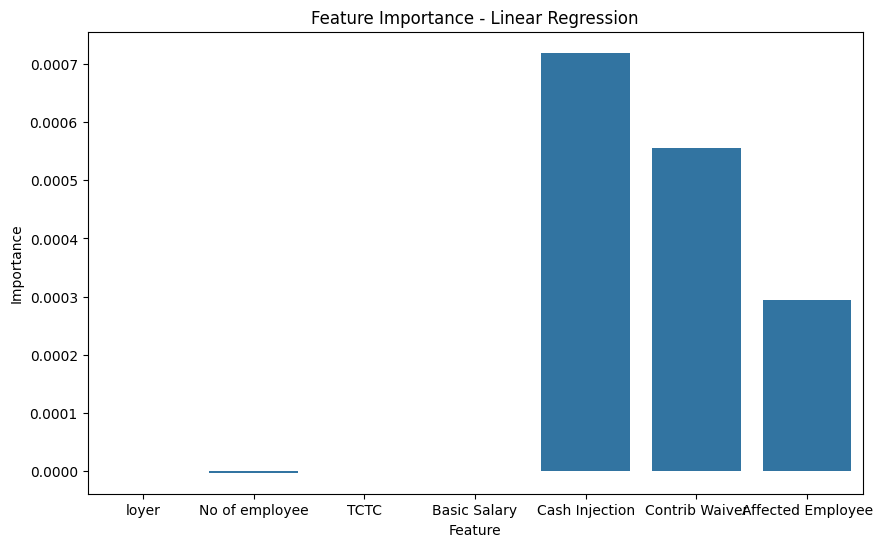

In [67]:
# Plot Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Importance', data=feat_df)
plt.title("Feature Importance - Linear Regression")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

In [82]:
# Feature Scaling (important for some algorithms like SVM, Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [85]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}


In [86]:
# Store cross-validation results
cv_results = {}

In [99]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC


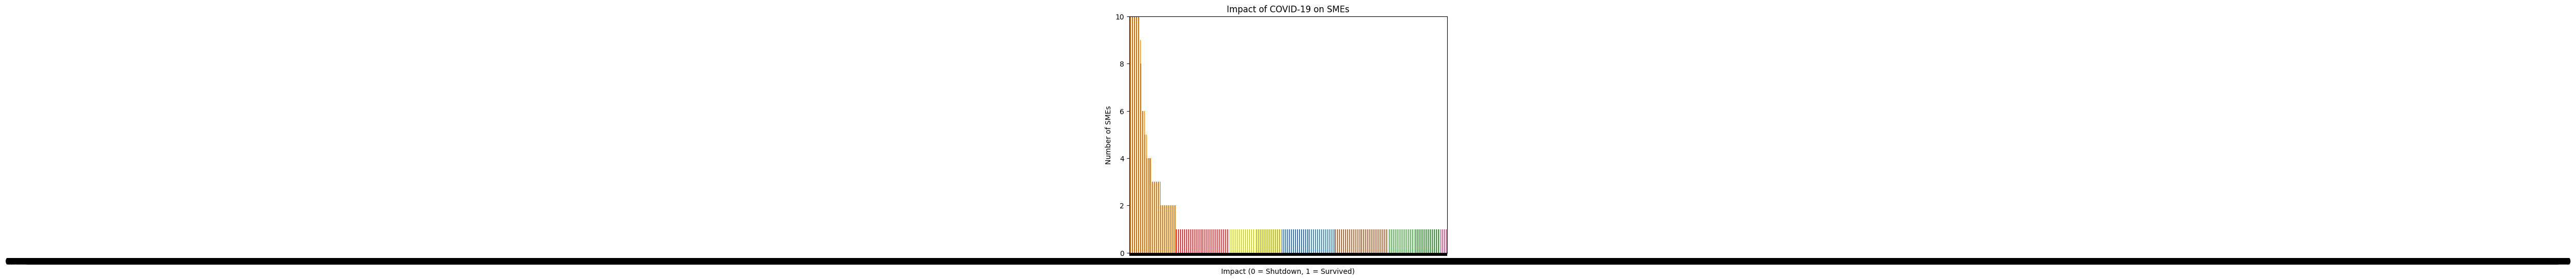

In [108]:
# Visualizing the impact on businesses
impact_counts = y.value_counts()

# Plot the impact
plt.figure(figsize=(8, 6))  # Optional: You can adjust the figure size for better visibility
impact_counts.plot(kind='bar', color=sns.color_palette("Set1", len(impact_counts)))

# Title and labels
plt.title('Impact of COVID-19 on SMEs')
plt.ylabel('Number of SMEs')
plt.xlabel('Impact (0 = Shutdown, 1 = Survived)')  # Adjust as per your data labels
plt.xticks(rotation=0)  # Keep x-axis labels horizontal for readability

plt.ylim(0, 10)
plt.show()


In [68]:
#Predicting impact on a new SME
new_sme = pd.DataFrame({
    'pre_covid_revenue': [500000],
    'post_covid_revenue': [300000],
    'employee_count': [50],
    'sector': [1],  # Assume 1 represents a certain sector
    'region': [3],  # Assume 3 represents a certain region
    'revenue_change': [300000]
})

In [70]:
# Assuming 'features' contains the correct columns used for training
new_sme = pd.DataFrame({
    'loyer': [500000],  # Example mapping, adjust as needed
    'No of employee': [50],
    'TCTC': [300000],
    'Basic Salary': [1],
    'Cash Injection': [3],
    'Contrib Waiver': [300000],
    'Affected Employee': [1]

})

# Scale the new data
new_sme_scaled = scaler.transform(new_sme)

In [72]:
# Predict the impact for the new SME
prediction = model.predict(new_sme_scaled)

# Get the index of the column with the highest predicted probability
predicted_class_index = np.argmax(prediction[0])

# Assuming your target columns are named like 'Annual turnover_value1', 'Annual turnover_value2', etc.
predicted_class_name = y.columns[predicted_class_index]

# Extract the actual value from the column name (e.g., 'value1')
predicted_value = predicted_class_name.split('_')[-1]

print(f"The predicted impact on this SME: {predicted_value}")

The predicted impact on this SME: 300000


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [105]:
import joblib